<a href="https://colab.research.google.com/github/fidelis2025/stankelly-website/blob/main/Zahra_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install prophet
!pip install pmdarima
!pip install scikit-learn
!pip install matplotlib seaborn openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 689.1/689.1 kB 19.0 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Step 1: Upload file manually
from google.colab import files
import pandas as pd

uploaded = files.upload()  # This lets you pick file from your PC
file_path = list(uploaded.keys())[0]  # Automatically use uploaded filename

# Step 2: Read dataset
# Use pd.read_excel for .xlsx files
data = pd.read_excel(file_path)

Saving Zahra RESPONSES UPDATE.xlsx to Zahra RESPONSES UPDATE.xlsx


Step 2. Data preparation and time indexing

In [6]:
import numpy as np

data['date'] = pd.date_range(
    start='2020-01-07',
    periods=len(data),
    freq='W'
)

weekly_data = data.groupby('date').mean(numeric_only=True).reset_index()

prophet_df = weekly_data.rename(columns={
    'date': 'ds',
    'Academic Performance': 'y'
})

Step 3. Exploratory analysis

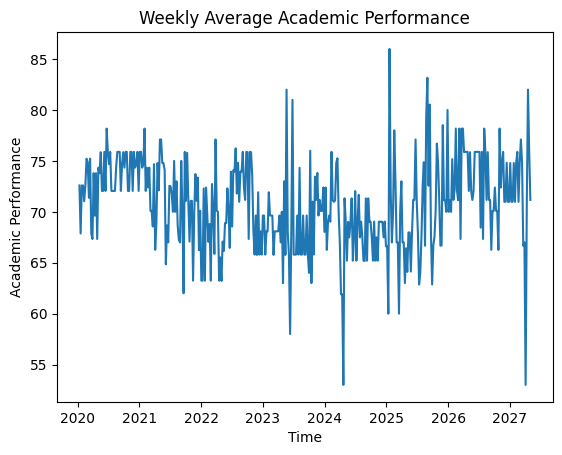

Index(['ds', 'y', 'Gender', 'Age', 'Academic level', 'Semester',
       'College/School', 'Program', 'Self-related Digital Literacy',
       'Frequency of Social Media Access', 'Socia Media Usage ',
       'Social Media Effects'],
      dtype='object')


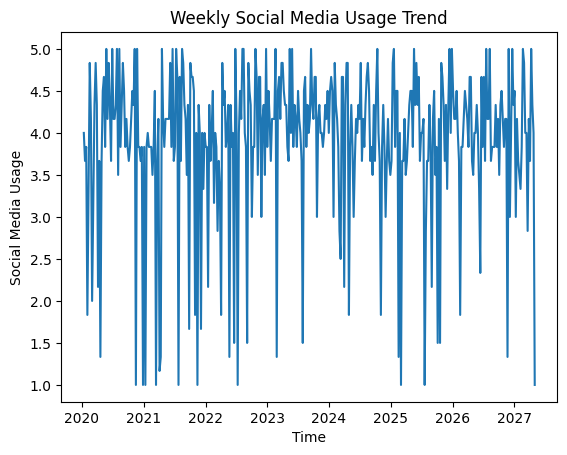

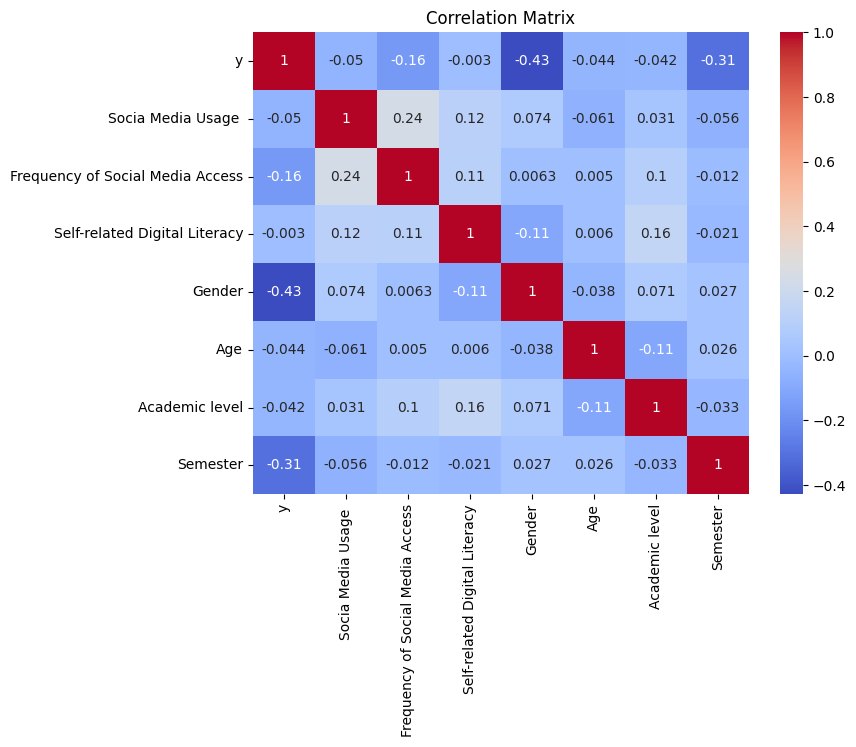

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
plt.plot(prophet_df['ds'], prophet_df['y'])
plt.title('Weekly Average Academic Performance')
plt.xlabel('Time')
plt.ylabel('Academic Performance')
plt.show()

# The error 'KeyError: 'Social Media Usage'' indicates that the column 'Social Media Usage' does not exist in the DataFrame.
# Please check the exact column names in your DataFrame.
# To see all available columns, uncomment the line below and run the cell:
print(prophet_df.columns)

plt.figure()
plt.plot(prophet_df['ds'], prophet_df['Socia Media Usage ']) # Corrected column name
plt.title('Weekly Social Media Usage Trend')
plt.xlabel('Time')
plt.ylabel('Social Media Usage')
plt.show()

corr_vars = [
    'y',
    'Socia Media Usage ', # Corrected column name
    'Frequency of Social Media Access',
    'Self-related Digital Literacy',
    'Gender',
    'Age',
    'Academic level',
    'Semester'
]

plt.figure(figsize=(8,6))
sns.heatmap(prophet_df[corr_vars].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

Step 4. Fiting Prophet with Uganda public holidays specification

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


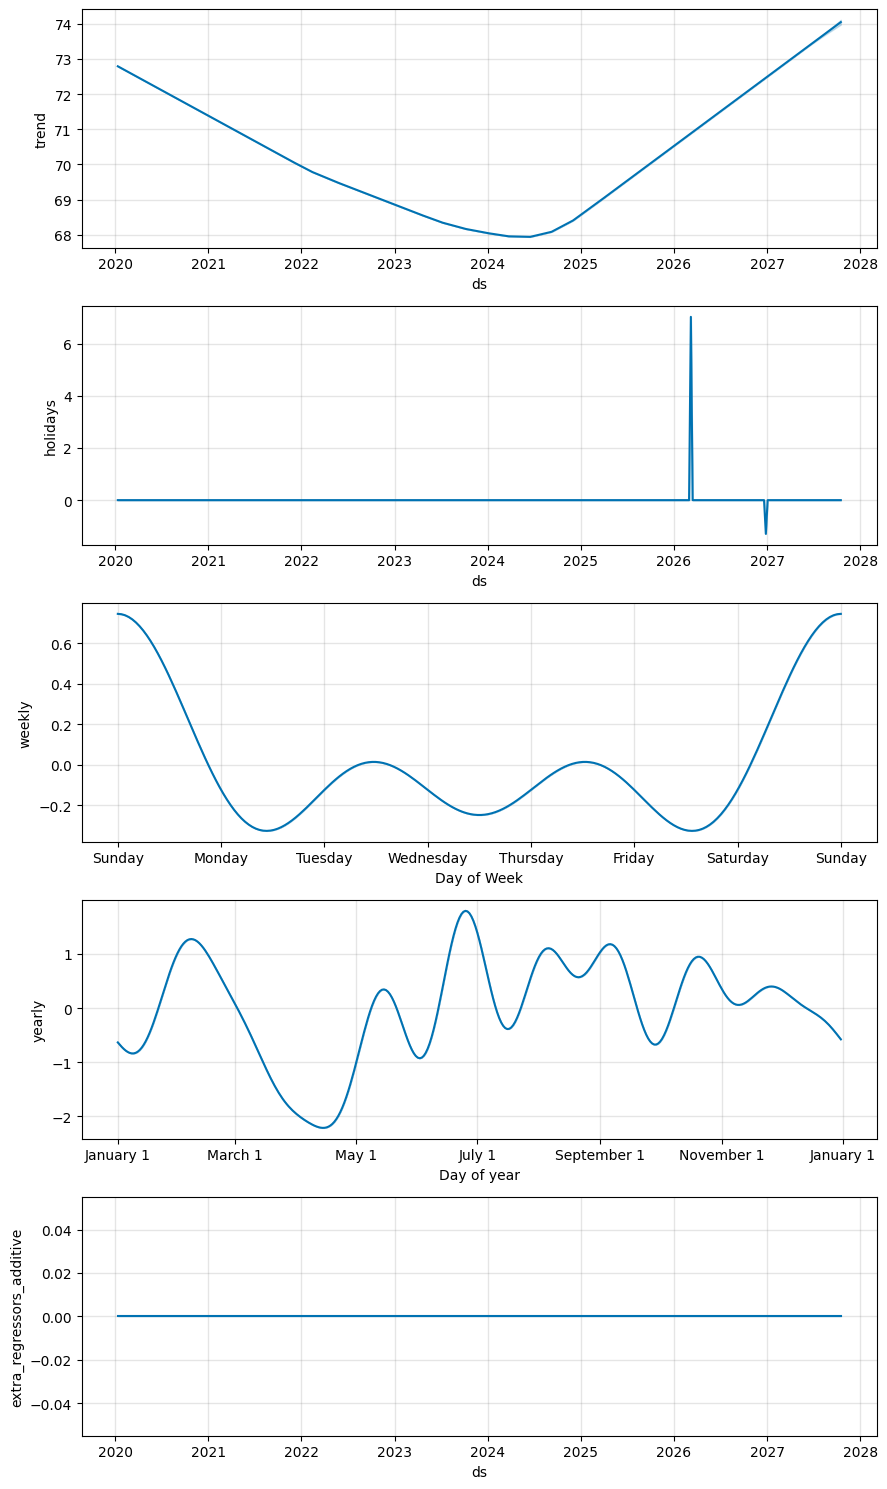

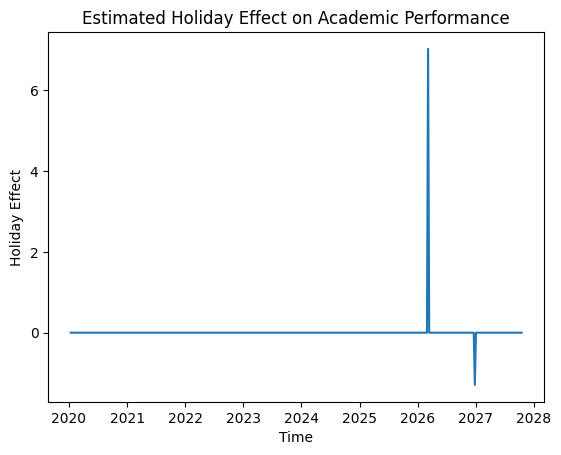

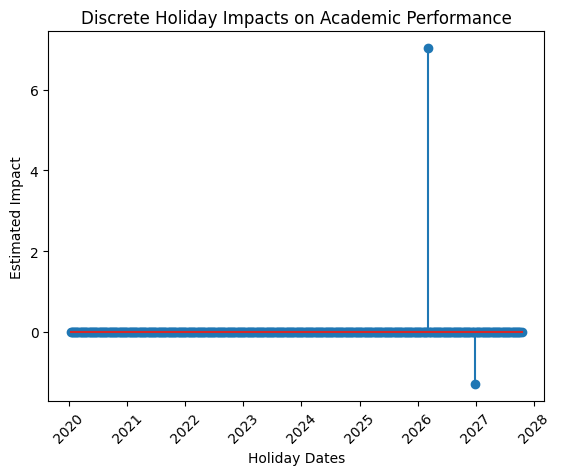

In [65]:
holidays = pd.DataFrame({
    'holiday': [
        'NewYear', 'NRM_Day', 'Luwum_Day', 'Womens_Day', 'Labour_Day',
        'Martyrs_Day', 'Heroes_Day', 'Independence_Day', 'Christmas',
        'Boxing_Day', 'Good_Friday', 'Easter_Monday',
        'Eid_Fitr', 'Eid_Adha'
    ],
    'ds': pd.to_datetime([
        '2026-01-01', '2026-01-26', '2026-02-16', '2026-03-08',
        '2026-05-01', '2026-06-03', '2026-06-09', '2026-10-09',
        '2026-12-25', '2026-12-26', '2026-04-03', '2026-04-06',
        '2026-03-20', '2026-05-27'
    ]),
    'lower_window': 0,
    'upper_window': 1
})

from prophet import Prophet

holiday_model = Prophet(
    holidays=holidays,
    yearly_seasonality=True,
    weekly_seasonality=True
)

holiday_model.add_regressor('Socia Media Usage ')
holiday_model.add_regressor('Frequency of Social Media Access')
holiday_model.add_regressor('Self-related Digital Literacy')

holiday_model.fit(prophet_df)
holiday_model.params

future = holiday_model.make_future_dataframe(periods=24, freq='W')

future['Socia Media Usage '] = prophet_df['Socia Media Usage '].mean()
future['Frequency of Social Media Access'] = prophet_df['Frequency of Social Media Access'].mean()
future['Self-related Digital Literacy'] = prophet_df['Self-related Digital Literacy'].mean()

forecast = holiday_model.predict(future)

holiday_model.plot_components(forecast)

import matplotlib.pyplot as plt

plt.figure()
plt.plot(forecast['ds'], forecast['holidays'])
plt.title('Estimated Holiday Effect on Academic Performance')
plt.xlabel('Time')
plt.ylabel('Holiday Effect')
plt.show()

holiday_effects = forecast[['ds', 'holidays']].dropna()

plt.figure()
plt.stem(
    holiday_effects['ds'],
    holiday_effects['holidays']
)
plt.title('Discrete Holiday Impacts on Academic Performance')
plt.xlabel('Holiday Dates')
plt.ylabel('Estimated Impact')
plt.xticks(rotation=45)
plt.show()

Step 5. Prophet model with social media regressors

In [61]:
import pandas as pd
import numpy as np
from prophet import Prophet

prophet_model = Prophet(
    holidays=holidays,
    yearly_seasonality=True,
    weekly_seasonality=True,
    changepoint_prior_scale=0.05
)

prophet_model.add_regressor('Socia Media Usage ')
prophet_model.add_regressor('Frequency of Social Media Access')
prophet_model.add_regressor('Self-related Digital Literacy')

prophet_model.fit(prophet_df)
prophet_model.params

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


OrderedDict([('lp__', array([[983.70622]])),
             ('k', array([[-0.12285775]])),
             ('m', array([[0.84639065]])),
             ('delta',
              array([[ 5.3066368e-09, -3.3641274e-06, -8.0152476e-08, -4.1323192e-08,
                       9.0277700e-09,  1.7207923e-08,  1.3059068e-07,  6.0295858e-03,
                       2.2867884e-02,  6.7605926e-03,  2.3411734e-07,  2.5964596e-09,
                       7.5911361e-04,  4.5628892e-03,  2.1110631e-02,  1.7961548e-02,
                       8.5162537e-03,  2.8706937e-02,  5.8799275e-02,  6.5497747e-02,
                       4.4596254e-02,  3.5486498e-03,  4.6161187e-09,  5.0045817e-08,
                      -2.3468321e-08]])),
             ('sigma_obs', array([[0.04558132]])),
             ('beta',
              array([[-0.00764732, -0.00132505,  0.0038779 ,  0.0053174 ,  0.00428017,
                      -0.00386959, -0.00103441, -0.00594568, -0.00063818, -0.00196186,
                      -0.00247787,  0.00

Step 6. Forecasting academic performance

Forecasted Academic Performance for the Next 24 Weeks
            ds       yhat  yhat_lower  yhat_upper
382 2027-05-09  73.914934   68.850976   79.002347
383 2027-05-16  74.301694   69.327157   79.462587
384 2027-05-23  73.879006   68.915007   78.512352
385 2027-05-30  73.233914   68.314761   78.341422
386 2027-06-06  73.282728   68.370083   78.246414
387 2027-06-13  74.303672   69.820558   79.344628
388 2027-06-20  75.549328   70.777945   80.675420
389 2027-06-27  75.957902   71.230840   81.181860
390 2027-07-04  75.254348   70.303761   79.896024
391 2027-07-11  74.237358   68.920039   79.426623
392 2027-07-18  73.925376   68.656150   79.242169
393 2027-07-25  74.512584   69.580093   79.528615
394 2027-08-01  75.281146   70.271139   80.550396
395 2027-08-08  75.498620   70.388122   79.917362
396 2027-08-15  75.214808   70.410238   80.099897
397 2027-08-22  75.059300   70.237817   80.371352
398 2027-08-29  75.366359   70.083071   80.374506
399 2027-09-05  75.732438   70.273320   80.758

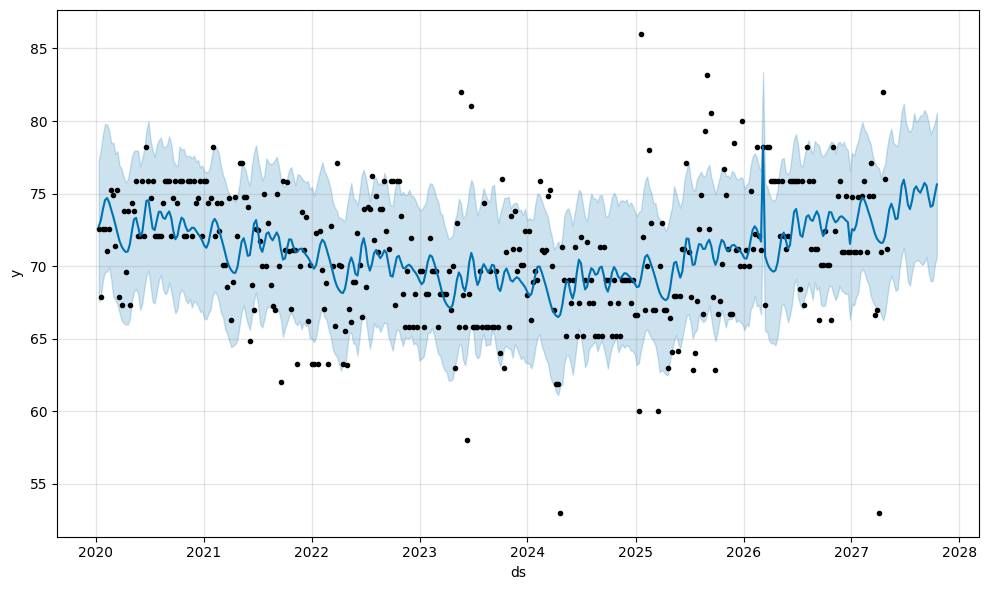

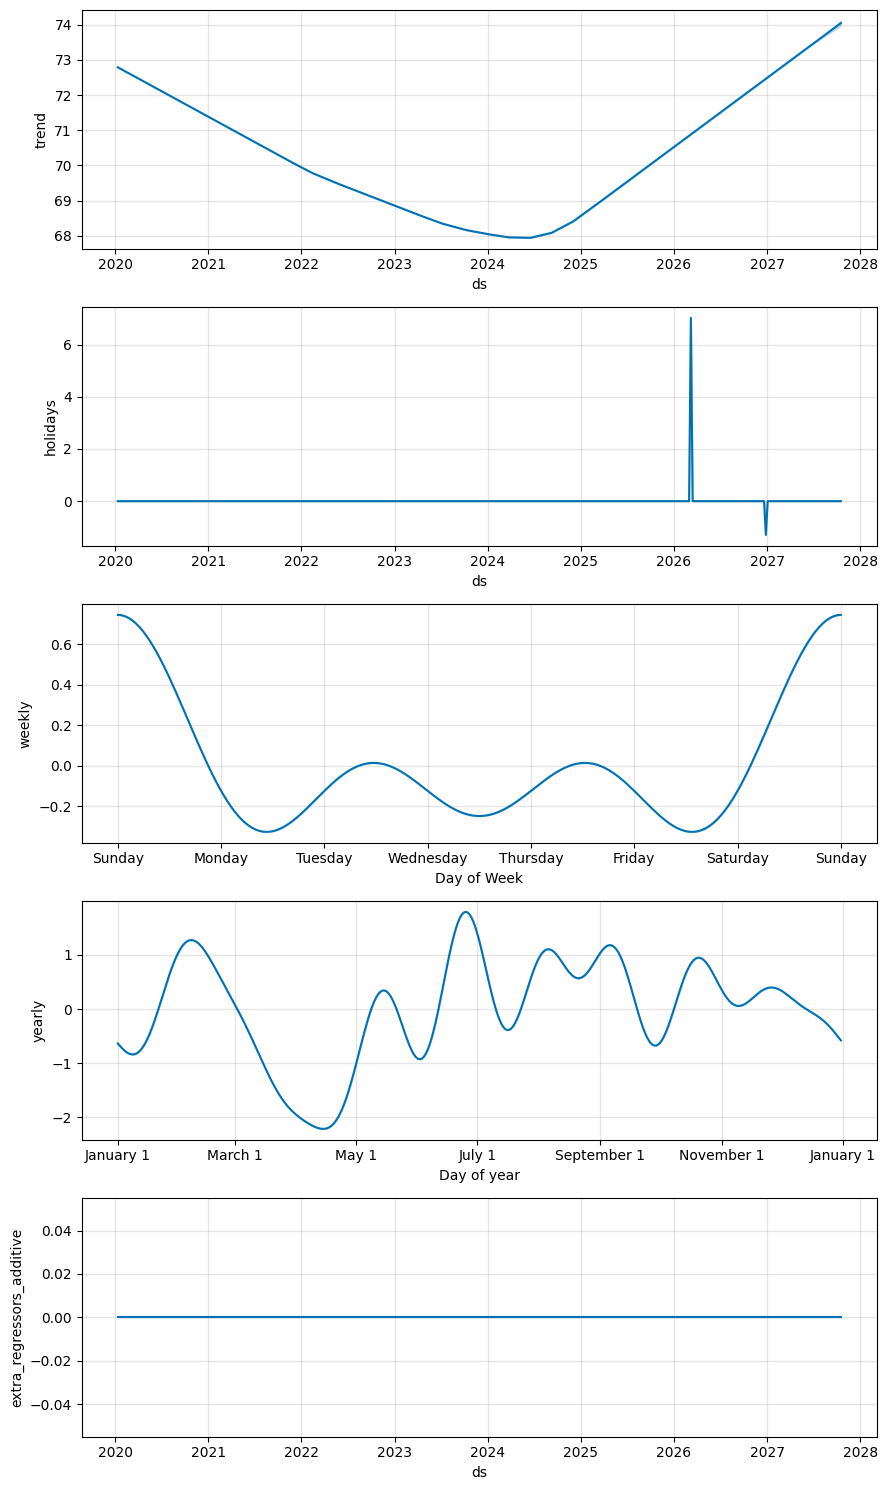

In [62]:
future = prophet_model.make_future_dataframe(periods=24, freq='W')

for col in [
    'Socia Media Usage ',
    'Frequency of Social Media Access',
    'Self-related Digital Literacy'
]:
    future[col] = prophet_df[col].mean()

forecast = prophet_model.predict(future)

prophet_model.plot(forecast)
prophet_model.plot_components(forecast)

# Extract only future forecasts
forecast_future = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(24)

print("Forecasted Academic Performance for the Next 24 Weeks")
print(forecast_future)

Step 7. Hypothesis H₀₁ testing

In [49]:
prophet_model.params['beta']

array([[-0.00764732, -0.00132505,  0.0038779 ,  0.0053174 ,  0.00428017,
        -0.00386959, -0.00103441, -0.00594568, -0.00063818, -0.00196186,
        -0.00247787,  0.00223483, -0.00048556, -0.00367381, -0.00296266,
         0.00014701,  0.00393389,  0.00023553, -0.00297003,  0.0016091 ,
         0.00125095, -0.00259762, -0.00225413,  0.00179761,  0.00281085,
        -0.00064156,  0.        , -0.01503606,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.08169773,  0.        , -0.0003836 ,
        -0.00847541,  0.00147029]])

In [48]:
beta_samples = prophet_model.params['beta'][:, :num_extra_regressors]

beta_summary = pd.DataFrame({
    'Regressor': regressor_names,
    'Mean': beta_samples.mean(axis=0),
    'Std_Dev': beta_samples.std(axis=0),
    'Lower_95': np.percentile(beta_samples, 2.5, axis=0),
    'Upper_95': np.percentile(beta_samples, 97.5, axis=0)
})

beta_summary

,Regressor,Mean,Std_Dev,Lower_95,Upper_95
0,Socia Media Usage,-0.007647,0.0,-0.007647,-0.007647
1,Frequency of Social Media Access,-0.001325,0.0,-0.001325,-0.001325
2,Self-related Digital Literacy,0.003878,0.0,0.003878,0.003878


Step 8. Changepoint and seasonality testing with Prophet accuracy

In [60]:
from prophet import Prophet
import numpy as np
import pandas as pd

restricted_model = Prophet(
    holidays=holidays,
    yearly_seasonality=False,
    weekly_seasonality=False,
    n_changepoints=0
)

restricted_model.add_regressor('Socia Media Usage ')
restricted_model.add_regressor('Frequency of Social Media Access')
restricted_model.add_regressor('Self-related Digital Literacy')

restricted_model.fit(prophet_df)

train = prophet_df.iloc[:-24]
test = prophet_df.iloc[-24:]

future_restricted = restricted_model.make_future_dataframe(periods=24, freq='W')

for col in [
    'Socia Media Usage ',
    'Frequency of Social Media Access',
    'Self-related Digital Literacy'
]:
    future_restricted[col] = prophet_df[col].mean()

restricted_forecast = restricted_model.predict(future_restricted)
restricted_forecast_test = restricted_forecast.iloc[-24:]

from sklearn.metrics import mean_absolute_error, mean_squared_error

def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

restricted_mae = mean_absolute_error(test['y'], restricted_forecast_test['yhat'])
restricted_rmse = np.sqrt(mean_squared_error(test['y'], restricted_forecast_test['yhat']))
restricted_mape = mape(test['y'], restricted_forecast_test['yhat'])

print("Estimated changepoints (Full Prophet model):")
for cp in prophet_model.changepoints:
    print(cp.date())

changepoint_effects = prophet_model.params['delta'][0]

changepoint_table = pd.DataFrame({
    'Changepoint Date': prophet_model.changepoints,
    'Effect Size': changepoint_effects
})

changepoint_table

print("Seasonality components included in full model:")
print(prophet_model.seasonalities)

print("Restricted model seasonality:")
print(restricted_model.seasonalities)

changepoint_seasonality_comparison = pd.DataFrame({
    'Model': ['Full Prophet', 'Restricted Prophet'],
    'MAE': [prophet_mae, restricted_mae],
    'RMSE': [prophet_rmse, restricted_rmse],
    'MAPE': [prophet_mape, restricted_mape]
})

changepoint_seasonality_comparison

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


Estimated changepoints (Full Prophet model):
2020-04-05
2020-06-28
2020-09-20
2020-12-20
2021-03-14
2021-06-06
2021-08-29
2021-11-21
2022-02-13
2022-05-15
2022-08-07
2022-10-30
2023-01-22
2023-04-16
2023-07-09
2023-10-08
2023-12-31
2024-03-24
2024-06-16
2024-09-08
2024-12-01
2025-03-02
2025-05-25
2025-08-17
2025-11-09
Seasonality components included in full model:
OrderedDict({'yearly': {'period': 365.25, 'fourier_order': 10, 'prior_scale': 10.0, 'mode': 'additive', 'condition_name': None}, 'weekly': {'period': 7, 'fourier_order': 3, 'prior_scale': 10.0, 'mode': 'additive', 'condition_name': None}})
Restricted model seasonality:
OrderedDict()


,Model,MAE,RMSE,MAPE
0,Full Prophet,3.879807,5.917394,NaN
1,Restricted Prophet,3.738375,5.438007,NaN


Step 9. ARIMA benchmark

In [43]:
from pmdarima import auto_arima

arima_model = auto_arima(test['y'], seasonal=False)
arima_forecast = arima_model.predict(n_periods=24)

arima_mae = mean_absolute_error(test['y'], arima_forecast)
arima_rmse = np.sqrt(mean_squared_error(test['y'], arima_forecast))
arima_mape = mape(test['y'], arima_forecast)

Step 10. Regression based forecasting with controls

In [56]:
from sklearn.linear_model import LinearRegression

X = prophet_df[
    [
        'Socia Media Usage ',
        'Frequency of Social Media Access',
        'Self-related Digital Literacy',
        'Gender',
        'Age',
        'Academic level',
        'Semester'
    ]
]

y = prophet_df['y']

X_train, X_test = X.iloc[:-24], X.iloc[-24:]
y_train, y_test = y.iloc[:-24], y.iloc[-24:]

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test) # Corrected: predict on X_test

lr_mae = mean_absolute_error(y_test, lr_pred)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_pred))
lr_mape = mape(y_test, lr_pred)

num_extra_regressors = len(prophet_model.extra_regressors.keys())
beta = prophet_model.params['beta'][0, :num_extra_regressors]

regressor_names = list(prophet_model.extra_regressors.keys())

beta_df = pd.DataFrame({
    'Regressor': regressor_names,
    'Coefficient': beta
})

beta_df

,Regressor,Coefficient
0,Socia Media Usage,-0.007647
1,Frequency of Social Media Access,-0.001325
2,Self-related Digital Literacy,0.003878


Step 11. Model comparison table

Hypothesis H₀₂

In [57]:
results = pd.DataFrame({
    'Model': ['Prophet', 'ARIMA', 'Regression'],
    'MAE': [prophet_mae, arima_mae, lr_mae],
    'RMSE': [prophet_rmse, arima_rmse, lr_rmse],
    'MAPE': [prophet_mape, arima_mape, lr_mape]
})

results

,Model,MAE,RMSE,MAPE
0,Prophet,3.879807,5.917394,NaN
1,ARIMA,3.502788,5.195370,NaN
2,Regression,4.096095,5.126370,5.847212


4. Changepoint effects summary

Used for Hypothesis H₀₄

In [52]:
changepoints = prophet_model.changepoints
delta = prophet_model.params['delta'].mean(axis=0)

changepoint_df = pd.DataFrame({
    'Changepoint_Date': changepoints,
    'Trend_Change_Effect': delta
})

changepoint_df.head()

,Changepoint_Date,Trend_Change_Effect
12,2020-04-05,5.306637e-09
24,2020-06-28,-3.364127e-06
36,2020-09-20,-8.015248e-08
49,2020-12-20,-4.132319e-08
61,2021-03-14,9.027770e-09


In [53]:
seasonality_strength = prophet_model.seasonalities
seasonality_strength

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None}),
             ('weekly',
              {'period': 7,
               'fourier_order': 3,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])